# 2D Filter Analysis 

We saw that down- and up-sampling creates spectral copies of our signal and **aliasing artifacts**, and that we can **avoid them using a low pass filter**. This low pass filter supresses the high frequencies, which appear towards the middle of our 2D DFT of the image, and keep the low frequencies, which appear near the corners of the 2D DFT. A **convolution** of our image with a filter kernel corresponds to a **multiplication** of the 2D DFT of the image with the 2D DFT of the filter kernel. Hence ideally the 2D DFT of our filter kernel (its 2D frequency response) should have **values 1 near the corners and zeros towards the center**.


To see if this is the case, we take our rectangular filter kernel and analyse it:

In [1]:
import numpy as np
h1 = np.ones((8,8))
h1

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

We now compute the 2D-frequency response of the rectangular filter kernel:

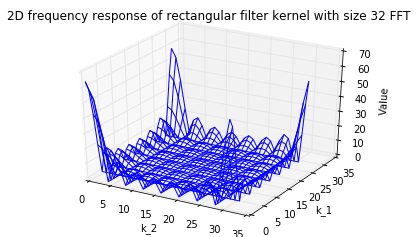

In [2]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np

h1 = np.ones((8,8))
A = np.abs(np.fft.fft2(h1,(32,32)))
[r,c] = A.shape 
x = range(c) 
y = range(r) 
X,Y = np.meshgrid(x,y) 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.plot_wireframe(X, Y, A) 
ax.set_xlabel('k_2') 
ax.set_ylabel('k_1') 
ax.set_zlabel('Value') 
plt.title('2D frequency response of rectangular filter kernel with size 32 FFT')

Now we analyse our pyramidal filter kernel:

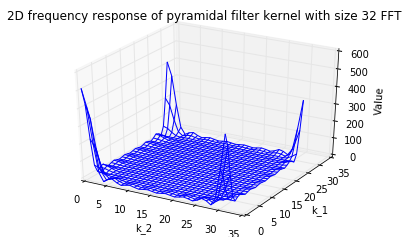

In [3]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np

h1 = np.ones((8,8))
h2 = scipy.signal.convolve2d(h1,h1)/8
A = np.abs(np.fft.fft2(h2, (32,32)));
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.plot_wireframe(X, Y, A) 
ax.set_xlabel('k_2') 
ax.set_ylabel('k_1') 
ax.set_zlabel('Value') 
plt.title('2D frequency response of pyramidal filter kernel with size 32 FFT') 

Compare it with the frequency response of our rectangular filter kernel. We see that the side lobes are much smaller, which means the pyramidal filter kernel suppresses the higher frequencies better, and hence it a **better low pass filter**, which better suppresses aliasing artifacts in sampling.